In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
print(os.listdir("/content/drive/MyDrive/OCR DATASET PICS"))


['thyrocare_0_8491.jpg', 'thyrocare_0_1001.jpg', 'thyrocare_0_8231.jpg', 'thyrocare_0_8265.jpg', 'thyrocare_0_838.jpg', 'thyrocare_0_5896.jpg', 'thyrocare_0_2838.jpg', 'thyrocare_0_4557.jpg', 'thyrocare_0_9445.jpg', 'thyrocare_0_1915.jpg', 'thyrocare_0_5503.jpg', 'thyrocare_0_6698.jpg', 'thyrocare_0_6222.jpg', 'thyrocare_0_4523.jpg', 'thyrocare_0_7083.jpg', 'thyrocare_0_2987.jpg', 'thyrocare_0_6214.jpg', 'thyrocare_0_36.jpg', 'thyrocare_0_532.jpg', 'thyrocare_0_3753.jpg', 'thyrocare_0_5357.jpg', 'thyrocare_0_8251.jpg', 'thyrocare_0_7635.jpg', 'thyrocare_0_421.jpg', 'thyrocare_0_8310.jpg', 'thyrocare_0_3414.jpg', 'thyrocare_0_2300.jpg', 'thyrocare_0_5928.jpg', 'thyrocare_0_1374.jpg', 'thyrocare_0_2841.jpg', 'thyrocare_0_3558.jpg', 'thyrocare_0_7109.jpg', 'thyrocare_0_4683.jpg', 'thyrocare_0_5816.jpg', 'thyrocare_0_1711.jpg', 'thyrocare_0_2177.jpg', 'thyrocare_0_8302.jpg', 'thyrocare_0_7075.jpg', 'thyrocare_0_4046.jpg', 'thyrocare_0_3813.jpg', 'thyrocare_0_2866.jpg', 'thyrocare_0_9076.jp

In [3]:
from google.colab import files

uploaded = files.upload()

Saving thyrocare_0_2649.jpg to thyrocare_0_2649.jpg


In [4]:
pip install boto3 pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.5 MB/s eta 0:00:00


In [5]:
import sys

print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [6]:
!pip install pytesseract

In [7]:
import cv2
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
pip install boto3 pillow pandas


In [9]:
!pip install opencv-python pytesseract torch torchvision
!sudo apt install -y tesseract-ocr
!pip install opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [10]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
!mkdir model && mv yolov3.weights model/


--2025-03-19 16:26:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  12.4MB/s    in 17s     

2025-03-19 16:26:36 (13.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2025-03-19 16:26:36--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3.cfg’

yolov3.cfg              [ <=>                ] 511.94K  --.-KB/s    in 0.01s   

2025-03-19 16:26:37 (49.0 MB/s) - ‘yolov3.cfg’ saved [524231]



In [11]:

%cd /content/
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet


/content
Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15873 (delta 13), reused 8 (delta 8), pack-reused 15845 (from 2)
Receiving objects: 100% (15873/15873), 14.50 MiB | 14.95 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.
/content/darknet


In [12]:

!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile


In [13]:

!make


mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [15]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/thyrocare_0_2649.jpg


./darknet: error while loading shared libraries: libcuda.so.1: cannot open shared object file: No such file or directory


In [16]:
!python detect.py --thyrocare_0_2649.jpg


python3: can't open file '/content/darknet/detect.py': [Errno 2] No such file or directory


In [17]:
"C:\\Users\\<YourUsername>\\Desktop\\OCR_Project\\local_dataset\\thyrocare_0_2649.jpg"

'C:\\Users\\<YourUsername>\\Desktop\\OCR_Project\\local_dataset\\thyrocare_0_2649.jpg'

In [18]:
!python detect.py --'thyrocare_0_2649.jpg'

python3: can't open file '/content/darknet/detect.py': [Errno 2] No such file or directory


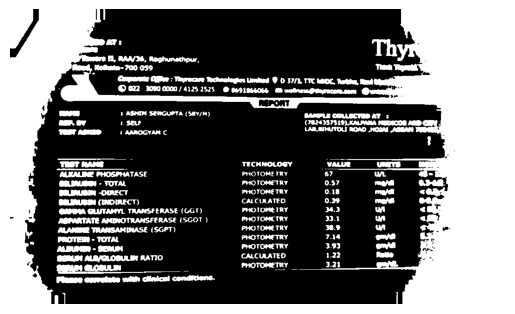

In [27]:
#load the test_image.jpg
image = cv2.imread("/content/thyrocare_0_2649.jpg")

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path and permissions.")
else:
    # image convert it into gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # GaussianBlur apply
    blurred = cv2.GaussianBlur(gray, (5,5), 0)


    #otsu thresholding apply for converting black background into white
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    #invert the image so the text should be convert into black and background in white colour
    final_image = cv2.bitwise_not(thresholded)

    # show processed image
    plt.imshow(final_image, cmap='gray')
    plt.axis("off")
    plt.show()

In [23]:
!pip install pytesseract

In [24]:
!pip install torch torchvision torchaudio
!git clone https://github.com/ultralytics/yolov3  # Clone the YOLOv3 repository
%cd yolov3
!pip install -r requirements.txt  # Install required packages

Cloning into 'yolov3'...
remote: Enumerating objects: 12088, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 12088 (delta 22), reused 15 (delta 15), pack-reused 12034 (from 3)
Receiving objects: 100% (12088/12088), 10.65 MiB | 7.71 MiB/s, done.
Resolving deltas: 100% (8199/8199), done.
/content/darknet/yolov3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 31.0 MB/s eta 0:00:00


In [1]:
import cv2
import pytesseract
from ultralytics import YOLO  # Import the YOLO class

# Load a pretrained YOLO model (using the weights file)
model = YOLO('/content/yolov3/yolov3.pt')  # Load the model using the weights file

# Load image and run YOLO detection
image = cv2.imread('/content/thyrocare_0_2649.jpg')
results = model(image)  # Run inference

# Extract bounding boxes and labels
boxes = results[0].boxes.xyxy.cpu().numpy()  # Get bounding boxes
labels = results[0].boxes.cls.cpu().numpy()  # Get labels

# Extract and recognize text
text_data = {}
for box, label in zip(boxes, labels):
    cropped_text = image[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    text = pytesseract.image_to_string(cropped_text)
    # Store text based on your data structure (e.g., using label as key)
    text_data[label] = text

PRO TIP 💡 Replace 'model=/content/yolov3/yolov3.pt' with new 'model=/content/yolov3/yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


0: 384x640 1 book, 4112.0ms
Speed: 6.3ms preprocess, 4112.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
# Tesseract OCR
custom_oem_psm_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(image, config=custom_oem_psm_config)
print("Extracted Text:\n", extracted_text)

Extracted Text:
 ’ :0CE AT: 7
Thyroe:
Shree Towers II, RAA/36, Raghunathpur, oe
VIP Road, Kolkata~700 059 Think Thyroid. Think Thyrocare.
Corporate Office : Thyrocare Technologies Limited @ D-37/3, TTC MIDC, Turbhe, Navi Mumbai - 400703. oy
© 022 - 3090 0000 / 41252525 @ 8691866066 & wellness@thyrocare.com @www.thyrocare.com_ -_
Pea =
NAME + ASHIM SENGUPTA (S8Y/M) SAMPLE COLLECTED AT: a
REF. BY + SELF (7824357519), KALPANA MEDICOS AND CITY a
TESTASKED — = AAROGYAMC LAB, BIHUTOLI ROAD ,HOJAL ,ASSAM 782435,782435
; } ;
JTESTNAME ___ ‘TECHNOLOGY VALUE UNITS NORMAL RANGE
ALKALINE PHOSPHATASE PHOTOMETRY 67 U/L 45-125 9
7 BILIRUBIN - TOTAL PHOTOMETRY 0.57 ma/di 0.3-1.2
BILIRUBIN -DIRECT PHOTOMETRY 0.18 mo/di <O.%
BILIRUBIN (INDIRECT) CALCULATED 0.39 ma/dl 009
GAMMA GLUTAMYL TRANSFERASE (GGT) PHOTOMETRY 34.3 ul <55
ASPARTATE AMINOTRANSFERASE (SGOT ) PHOTOMETRY 33.1 ul <35 i
ALANINE TRANSAMINASE (SGPT) PHOTOMETRY 38.9 uf <4 7
PROTEIN - TOTAL PHOTOMETRY 7.14 am/di 5.7-8.2
ALBUMIN - SERUM. PHOTO